# Part 1b: Predicting survival of Titanic passengers with decision trees
**DUE September 17th 2018**

## Introduction

The code for this project consists of several Python files, some of
which you will need to read and understand in order to complete the
assignment, and some of which you can ignore.

### Files You'll Edit

``assignment_1b.ipynb``: Will be your edited copy of this notebook pertaining to part 1a of the assignment

``features.py``: Simple feature engineering function



### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: all of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above under "Files
you'll edit". You will also have to answer the written questions in this
notebook denoted **Q#:** in the corresponding cells denoted with **A#:**.

#### Autograding

Your code will be autograded for technical correctness. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. However, the
correctness of your implementation -- not the autograder's output --
will be the final judge of your score.  If necessary, we will review
and grade assignments individually to ensure that you receive due
credit for your work.

## A quick look at the data

In `data/` you will find the following files:
    `titanic_train.csv`
        
    `titanic_test.csv`
    
Let's take a look at the CSV file using the [Pandas] package and import other packages we think we will need.

In [1]:
import pandas as pd
import dt
import features
import runClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Pandas lets us take read CSVs easily and allows us to manipulate the data with ease. So lets take a look at the data!

In [2]:
train_df = pd.read_csv('data/titanic_train.csv')
train_df.head()

,PassengerId,Survived,HighClassTicket,IsOld,hasLargeFamily,isSingle,hadNiceCabin,isAristocrat,Fare,Sex
0,128,1,0,0,0,1,0,0,7.1417,male
1,1037,0,0,0,0,0,0,0,18.0000,male
2,633,1,1,0,0,1,1,0,30.5000,male
3,1051,1,0,0,0,0,0,0,13.7750,female
4,727,1,1,0,0,0,0,0,21.0000,female


Each passenger is identified with a unique PassengerId and is labeled with whether or not she survived the Titanic accident. We can also see that we have some simple information about each of them. In each column, 1 signifies True and 0 False. Since the decision tree we have implemented is quite simple and knows to split on only binary features (either 1 or 0), we have preprocessed the data and have already binaraized some features for you. They are as follows:
- `HighClassTicket`: Signifies whether or not the passenger bought a ticket with some extra perks
- `IsOld`: Signifies whether or not the passenger is older than 22
- `hasLargeFamily`: Signifies whether the passenger had more than 4 other family members on board
- `isSingle`: Signifies whether the passenger had no other family members on board
- `hadNiceCabin`: Signifies whether the passenger purchased an upgraded cabin
- `isAristocrat`: Signifies whether the passenger had an aristocratic title in his/her name (E.g. Sir, Lord, Dutchess etc.)

However, you have to do some **feature engineering** and 'binarize' the remainding columns.

Unfortunately, the simple decision tree that we implemented does not know how to find partitions in features that are strings or features that are continuous. We will have to do some **feature engineering** to solve this. Binarizing the `Sex` feature is simple. However you will have to figure out a reasonable threshold for binarizing the `Fare` feature.

Do some data analysis below to find a reasonbable. **Plot a chart**  and **explain** why you chose the threshold you chose.
(Hint: Use histograms, analyze the survival rates and make a reasobable guess. Or find the threshold that minimizes impurity!)


Also, **complete** the `binarize_features` function in `binarize.py`, this function should return a Pandas dataframe with the same number of columns, and binarize the `Fare` and `Sex` columns to `int`s.

In [3]:
import statistics 
print("Mean: " + str(train_df['Fare'].mean()))
print("Median: " + str(train_df['Fare'].median()))
print("Max: " + str(train_df['Fare'].max()))
print("Stdev: " + str(statistics.stdev(train_df['Fare'])))

Mean: 33.75423810888252
Median: 14.4542
Max: 512.3292
Stdev: 51.996485547945035


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d2e7b00>]],
      dtype=object)

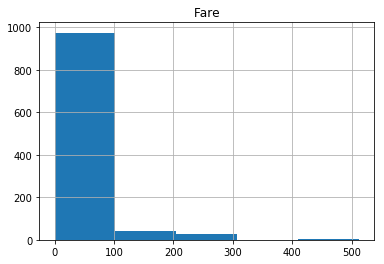

In [4]:
train_df.hist(column = 'Fare', bins = 5)

**Q1:** Why did you threshhold/binarize the `Fare` featuer at that value?

**A1:** The theshold fare is set to at 25 which is a roughly good approximation to the middle point in our dataset. As most ~90% of the fare is under 100 from the graph and the Mean is 33, 25 is roughly in the middle to clasify as cheap (0) and expensive (1)

In [5]:
train_df = features.binarize_features(train_df, 25)
train_df.head()

,PassengerId,Survived,HighClassTicket,IsOld,hasLargeFamily,isSingle,hadNiceCabin,isAristocrat,Fare,Sex
0,128,1,0,0,0,1,0,0,0,0
1,1037,0,0,0,0,0,0,0,0,0
2,633,1,1,0,0,1,1,0,1,0
3,1051,1,0,0,0,0,0,0,0,1
4,727,1,1,0,0,0,0,0,0,1


Although there is a test csv, we won't always have access to labels in our test data. Instead, we hold out a portion (20%) of our training data to help us measure how generalizable the trained model is.

In [6]:
X, y = train_df.iloc[:,2:].values, train_df.iloc[:,1].values
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=422)

Using `hyperparameterCurve` in `runClassifier.py`, **plot** a corresponding chart of tree depth vs accuracy and **choose** the best tree depth.

Training classifier with maxDepth=1...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=2...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=3...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=4...
Training accuracy 0.848268, test accuracy 0.852381
Training classifier with maxDepth=5...
Training accuracy 0.848268, test accuracy 0.852381
Training classifier with maxDepth=6...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=7...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=8...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=12...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=16...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=20...
Training accuracy 0.847073, test accuracy 0.852381
Trainin

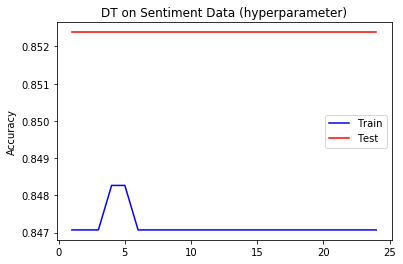

In [7]:
curve = runClassifier.hyperparamCurve(dt.DT({}), 'maxDepth', [1,2,3,4,5,6,7,8,12,16,20,24], X_train, y_train, X_holdout, y_holdout)
runClassifier.plotCurve('DT on Sentiment Data (hyperparameter)', curve)

**Q2:** According to your analysis, what is the best tree depth? Why?

**A2:** The best accuracy is around 4~5 which gives the highest train accuracy but it is mostly the same. 

Now let's retrain on all the data...

In [8]:
dt = dt.DT({'maxDepth': 5})
dt.train(X, y)

**Q3:** Why would we want to retrain a decision tree on all the data (`X` and `y`) and not just `X_train` and `y_train`?

**A3:** From the above experiments we know the best depth to run our simulation, now we must train it with more samples. The data is also scattered, like how the fare price was consentrated in the first 100 but was still scattered for later values. Also the data size increases by 1.25 times which is better for training. 

We can now test our decision tree the test data!

In [9]:
test_df = pd.read_csv('data/titanic_test.csv')
test_df = features.binarize_features(test_df, 25 )
X_test, y_test = test_df.iloc[:,2:].values, test_df.iloc[:,1].values

In [10]:
y_predicted = dt.predictAll(X_test)
acc = np.mean(y_test == y_predicted)
print("Test accuracy:", acc)

Test accuracy: 0.8854961832061069
